In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data= pd.read_csv('processed_data.csv')
data.columns

Index(['Unnamed: 0', 'customer_id', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english', 'product_category',
       'late

In [20]:
df = data[['customer_state', 'review_score', 'price', 'freight_value','payment_type', 'payment_installments',
       'payment_value', 'seller_state', 'product_category','purchase_interval']]

# Feature Engineering

## Customer_state: SP, MG, RJ, Others

In [21]:
df['customer_state'] = df['customer_state'].apply(lambda x: x if x in ['SP', 'MG', 'RJ'] else 'Others')

C:\Users\user1\AppData\Local\Temp\ipykernel_5364\2079533851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_state'] = df['customer_state'].apply(lambda x: x if x in ['SP', 'MG', 'RJ'] else 'Others')


## Seller_state: SP, MG, PR, Others

In [22]:
df['seller_state'].value_counts().head(5)

SP    82417
MG     9014
PR     8964
RJ     4906
SC     4221
Name: seller_state, dtype: int64

In [23]:
df['seller_state'] = df['seller_state'].apply(lambda x: x if x in ['SP', 'MG', 'PR'] else 'Others')

C:\Users\user1\AppData\Local\Temp\ipykernel_5364\1912853502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_state'] = df['seller_state'].apply(lambda x: x if x in ['SP', 'MG', 'PR'] else 'Others')


# One-hot encode categorical variables

In [24]:
columns_to_encode = ['customer_state', 'payment_type', 'seller_state', 'product_category']
df_encoded = pd.get_dummies(df, columns=columns_to_encode)

In [25]:
df_encoded

,review_score,price,freight_value,payment_installments,payment_value,purchase_interval,customer_state_MG,customer_state_Others,customer_state_RJ,customer_state_SP,...,seller_state_SP,product_category_Beauty & Health,product_category_Books & Stationery,product_category_Electronics,product_category_Entertainment,product_category_Fashion,product_category_Food & Drinks,product_category_Furniture,product_category_Home & Garden,product_category_Industry & Construction
0,4,124.99,21.88,2,146.87,More than 1 year,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,112.99,24.90,1,275.79,6 months-1 year,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1,112.99,24.90,1,275.79,6 months-1 year,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,3,124.99,15.62,7,140.61,More than 1 year,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,4,106.99,30.59,10,137.58,6 months-1 year,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,5,193.00,39.19,10,232.19,More than 1 year,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
115605,4,389.00,37.70,8,426.70,3-6 months,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
115606,5,139.00,21.46,3,160.46,More than 1 year,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
115607,5,129.00,26.18,2,55.18,More than 1 year,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Train test split

In [27]:
X = df_encoded.drop(columns=['purchase_interval'])
y = df_encoded['purchase_interval']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print("Training set - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Target:", y_test.shape)

Training set - Features: (92487, 26)  Target: (92487,)
Testing set - Features: (23122, 26)  Target: (23122,)


# Standardise numberical variables

In [31]:
numerical_columns = ['review_score', 'price', 'freight_value', 'payment_installments', 'payment_value']

scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [40]:
X_train.columns

Index(['review_score', 'price', 'freight_value', 'payment_installments',
       'payment_value', 'customer_state_MG', 'customer_state_Others',
       'customer_state_RJ', 'customer_state_SP', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_voucher', 'seller_state_MG', 'seller_state_Others',
       'seller_state_PR', 'seller_state_SP',
       'product_category_Beauty & Health',
       'product_category_Books & Stationery', 'product_category_Electronics',
       'product_category_Entertainment', 'product_category_Fashion',
       'product_category_Food & Drinks', 'product_category_Furniture',
       'product_category_Home & Garden',
       'product_category_Industry & Construction'],
      dtype='object')

# Multinomidal Logistic Regression

## Drop one dummy variable for each category to avoid multicollinearity

In [42]:
columns_to_drop = ['customer_state_Others', 'payment_type_voucher', 'seller_state_Others', 'product_category_Home & Garden']
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)

In [43]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

       0-30 days       0.20      0.00      0.00      1245
       1-3 month       0.29      0.04      0.07      2969
      3-6 months       0.33      0.02      0.04      4831
 6 months-1 year       0.38      0.91      0.54      8520
More than 1 year       0.36      0.12      0.18      5557

        accuracy                           0.38     23122
       macro avg       0.31      0.22      0.17     23122
    weighted avg       0.34      0.38      0.26     23122



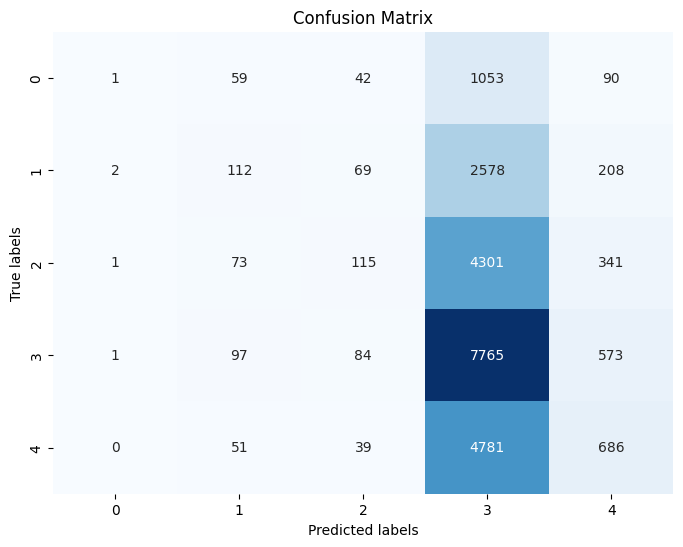

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [38]:
coefficients = model.coef_
intercept = model.intercept_
feature_names = X_train.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'coefficient': coefficients[0]})
coefficients_df = coefficients_df.sort_values(by='coefficient', ascending=False)
coefficients_df

,Feature,coefficient
11,payment_type_debit_card,0.661379
25,product_category_Industry & Construction,0.573414
22,product_category_Food & Drinks,0.493779
0,review_score,0.100387
2,freight_value,0.091265
8,customer_state_SP,0.076107
14,seller_state_Others,0.043380
4,payment_value,0.002417
24,product_category_Home & Garden,-0.004783
3,payment_installments,-0.026910


# Random Forest

In [56]:
rf_classifier = RandomForestClassifier(random_state=10)
rf_classifier.fit(X_train, y_train)
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)
test_accuracy = rf_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9891876696184329
Testing Accuracy: 0.616642158982787


In [57]:
predicted_y = rf_classifier.predict(X_test)
print(classification_report(y_test, predicted_y))

                  precision    recall  f1-score   support

       0-30 days       0.50      0.27      0.35      1245
       1-3 month       0.56      0.47      0.51      2969
      3-6 months       0.66      0.62      0.64      4831
 6 months-1 year       0.63      0.76      0.69      8520
More than 1 year       0.59      0.54      0.57      5557

        accuracy                           0.62     23122
       macro avg       0.59      0.53      0.55     23122
    weighted avg       0.61      0.62      0.61     23122



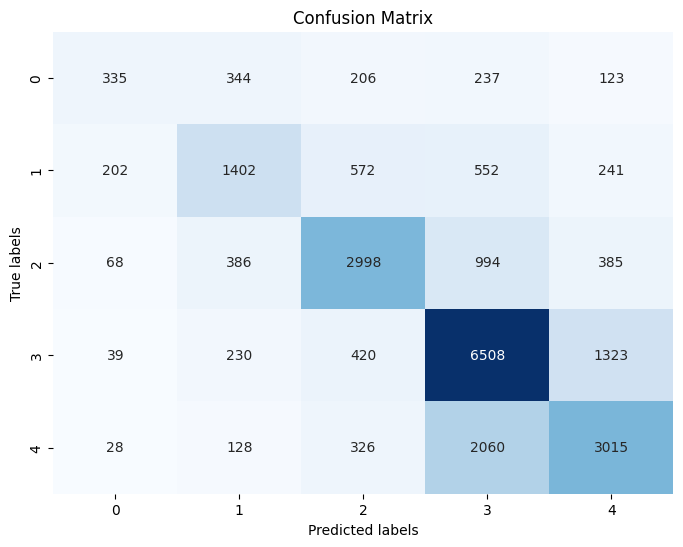

In [58]:
conf_matrix = confusion_matrix(y_test, predicted_y)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
f1 = f1_score(y_test, predicted_y, average='weighted')
print("F1:", f1)

F1: 0.6090250175360783


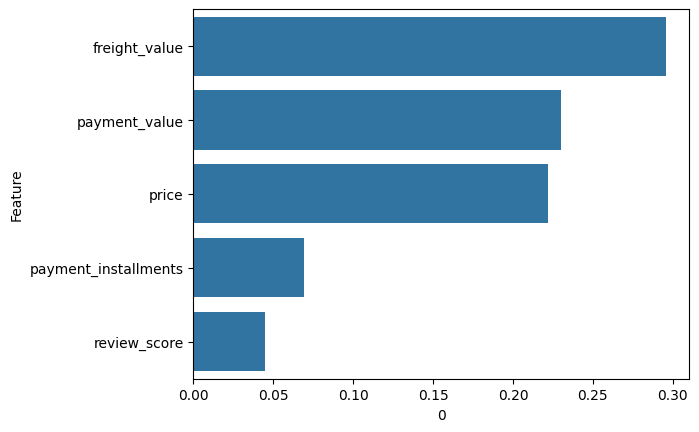

In [67]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_)
feature_importances["Feature"] = X_train.columns
sns.barplot(x=0, y='Feature', data=feature_importances.sort_values(by=0,ascending=False)[:5])
plt.show()